##### Copyright 2018 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Lucid: A Quick Tutorial

This tutorial quickly introduces [**Lucid**](https://github.com/tensorflow/lucid), a network for visualizing neural networks. Lucid is a kind of spiritual successor to DeepDream, but provides flexible abstractions so that it can be used for a wide range of interpretability research.

**Note**: The easiest way to use this tutorial is [as a colab notebook](https://colab.sandbox.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb), which allows you to dive in with no setup. We recommend you enable a free GPU by going:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

Thanks for trying Lucid!

<img src="https://storage.googleapis.com/lucid-static/common/stickers/channels-visualizations.jpg" width="600"></img>



## Install, Import, Load Model

In [2]:
# Install Lucid

!pip install --quiet lucid==0.2.3
#!pip install --quiet --upgrade-strategy=only-if-needed git+https://github.com/tensorflow/lucid.git

In [3]:
# Imports

import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [4]:
# Let's import a model from the Lucid modelzoo!

model = models.InceptionV1()
model.load_graphdef()

In this tutorial, we will be visualizing InceptionV1, also known as GoogLeNet.

While we will focus on a few neurons, you may wish to experiment with visualizing others. If you'd like, you can try any of the following layers: `conv2d0, maxpool0, conv2d1, conv2d2, maxpool1, mixed3a, mixed3b, maxpool4, mixed4a, mixed4b, mixed4c, mixed4d, mixed4e, maxpool10, mixed5a, mixed5b`.

You can learn more about GoogLeNet in the [paper](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf). You can also find visualizations of all neurons in mixed3a-mixed5b [here](https://distill.pub/2017/feature-visualization/appendix/).

## Visualize a Neuron

512 1312.2844



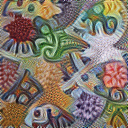

In [5]:
# Visualizing a neuron is easy!

_ = render.render_vis(model, "mixed4a_pre_relu:476")

## Getting a bit deeper

Lucid splits visualizations into a few components which you can fiddle with completely indpendently:

* **objectives** -- What do you want the model to visualize?
* **parameterization** -- How do you describe the image?
* **transforms** -- What transformations do you want your visualization to be robust to?

In this section, we'll experiment with each one.

**Experimenting with objectives**

In [ ]:
# Let's visualize another neuron using a more explicit objective:

obj = objectives.channel("mixed4a_pre_relu", 465)
_ = render.render_vis(model, obj)

In [ ]:
# Or we could do something weirder:
# (Technically, objectives are a class that implements addition.)

channel = lambda n: objectives.channel("mixed4a_pre_relu", n)
obj = channel(476) + channel(465)
_ = render.render_vis(model, obj)

**Transformation Robustness**

Recomended reading: The Feature Visualization article's section titled [The Enemy of Feature Visualization](https://distill.pub/2017/feature-visualization/#enemy-of-feature-vis) discusion of "Transformation Robustness." In particular, there's an interactive diagram that allows you to easily explore how different kinds of transformation robustness effects visualizations.

In [ ]:
# No transformation robustness

transforms = []
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

In [ ]:
# Jitter 2

transforms = [
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

In [ ]:
# Breaking out all the stops

transforms = [
    transform.pad(16),
    transform.jitter(8),
    transform.random_scale([n/100. for n in range(80, 120)]),
    transform.random_rotate(range(-10,10) + range(-5,5) + 10*range(-2,2)),
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

**Experimenting with parameterization**

Recomended reading: The Feature Visualization article's section on [Preconditioning and Parameterization](https://distill.pub/2017/feature-visualization/#preconditioning)

In [ ]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=False, decorrelate=False)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)

In [ ]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=True, decorrelate=True)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)